In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
from scipy.integrate import solve_ivp

In [161]:
def harmonic_oscillator(t, y, omega):
    x, v = y
    return np.array([v, -omega**2 * x])

def damped_harmonic_oscillator(t, y, zeta, omega):
    x, v = y
    return [v, -2 * zeta * omega * v - omega**2 * x]

def sm_damper_forcing(t, y, zeta, omega, gamma, alpha):
    x, v = y
    return [v, -2 * zeta * omega * v - omega**2 * x + gamma * np.cos(alpha * x)]

def duffing_oscillator(t, y, zeta, omega, beta, gamma, alpha):
    x, v = y
    return [v, -2 * zeta * omega * v - omega**2 * x - beta * x**3 + gamma * np.cos(alpha * x)]

def van_der_pol(t, y, mu, z):
    x, v = y
    return [v, mu * (1 - z*x**2) * v - z*x]

In [3]:
def harmonic_params(rng):
    return {'omega': rng.uniform(2, 6)}

def under_damped_harmonic_params(rng):
    return {'zeta': rng.uniform(0.02, 0.25),
            'omega': rng.uniform(2, 6)}

def spring_mass_forcing_params(rng):
    return {'zeta': rng.uniform(0.02, 0.15),
            'omega': rng.uniform(2, 6),
            'gamma': rng.uniform(1, 3),
            'alpha': rng.uniform(1, 3)}

def duffing_params(rng):
    return {'zeta' : rng.uniform(0.02, 0.15),
            'omega': rng.uniform(1, 3),
            'beta' : rng.uniform(0.5, 1.5),
            'gamma': rng.uniform(0.5, 1.5),
            'alpha': rng.uniform(1, 3)}

def vdp_params(rng):
    return {'mu': rng.uniform(0.5, 2)}

In [4]:
harm_d = 2
damped_harm_d = 2
sm_damp_d = 2
duffing_d = 2
van_der_pol_d = 2

In [163]:
systems = {
    'harmonic_oscillator' : (harmonic_oscillator, harmonic_params, harm_d),
    'under_damped_harmonic_oscillator' : (damped_harmonic_oscillator, under_damped_harmonic_params, damped_harm_d),
    'spring_mass_with_forcing' : (sm_damper_forcing, spring_mass_forcing_params, sm_damp_d),
    'duffing_oscillator' : (duffing_oscillator, duffing_params, duffing_d),
    'van_der_pol_oscillator' : (van_der_pol, vdp_params, van_der_pol_d)
          }

In [13]:
seed = 42
rng = np.random.default_rng(seed)
harmonic_params(rng)

{'omega': 5.095824194223853}

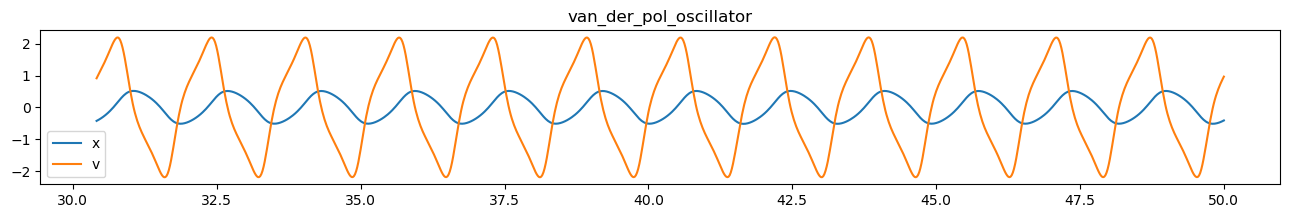

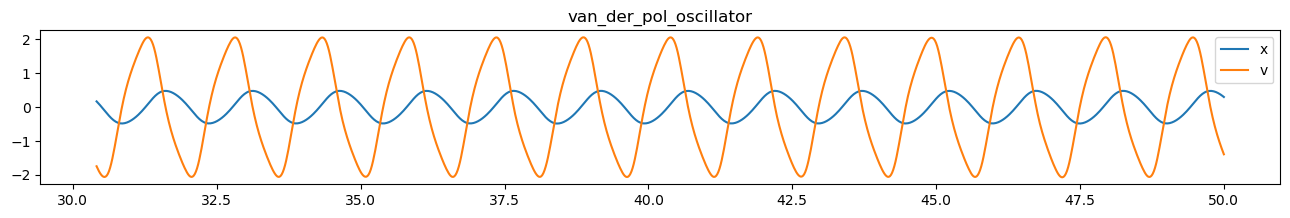

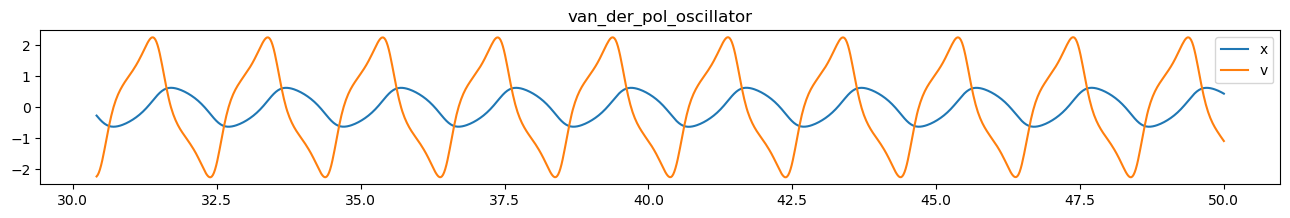

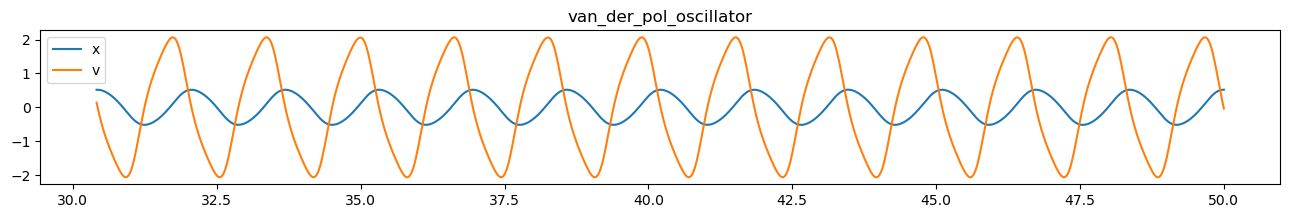

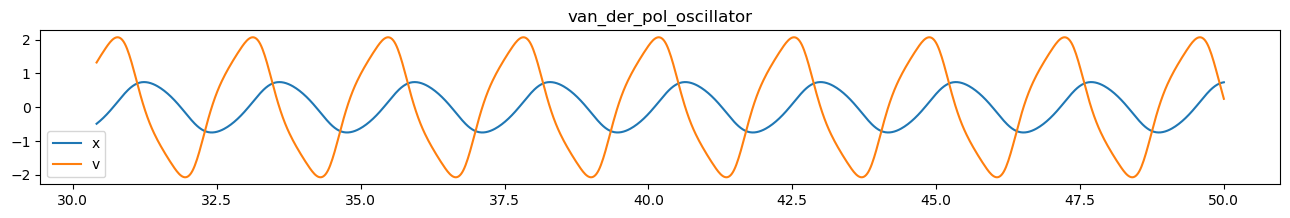

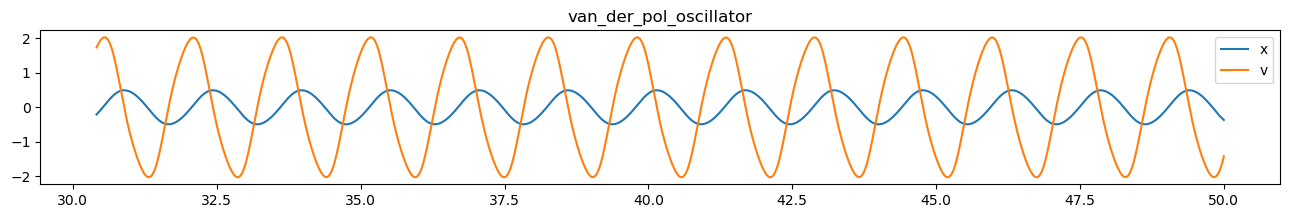

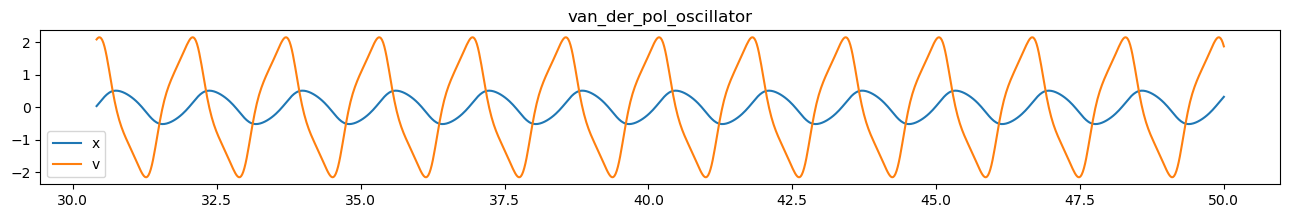

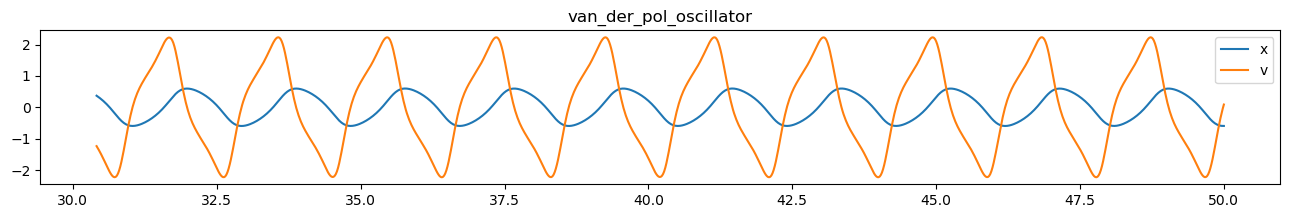

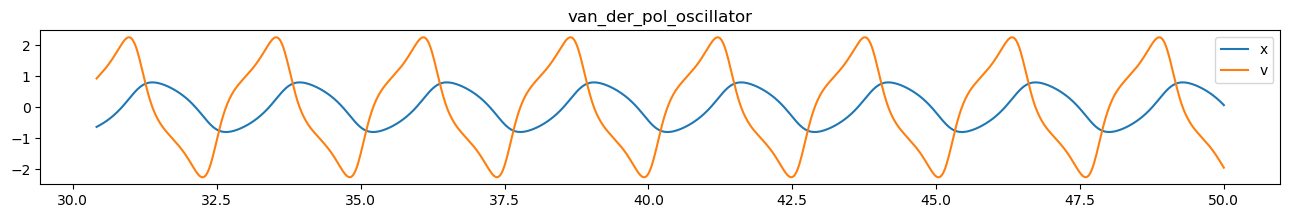

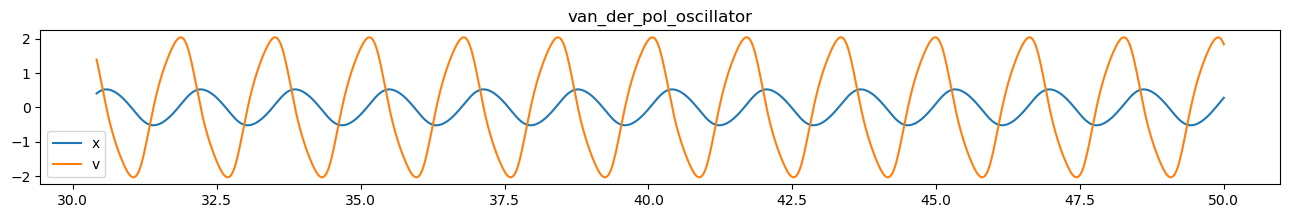

In [200]:
start = 1
end = 50
n = int(1000 * (50/20))
system = 'van_der_pol_oscillator'
# harmonic_oscillator, spring_mass_with_forcing
# duffing_oscillator, van_der_pol_oscillator

t_eval = np.linspace(start,end,n)


for i in range(10):
    params = {'mu': rng.uniform(0.5,2) , 'z' : rng.uniform(4, 20)}

    y0 = [np.random.uniform(-5,5), np.random.uniform(-5,5)]
    ode = systems[system][0]
    def wrapped_ode(t,y): return ode(t,y,**params)
    sol = solve_ivp(wrapped_ode, [start,end], y0, t_eval=t_eval)
    
    plt.figure(figsize=(16,2))
    x = sol.t[-1000:]
    plt.plot(x,sol.y[0,-1000:],label='x')
    plt.plot(x,sol.y[1,-1000:],label='v')
    
    plt.title(system)
    plt.legend()
    plt.show()

In [ ]:
# 20 seconds for these
# Harmonic Oscillator: {'omega': rng.uniform(5.0, 12.0)}
# Spring Mass Damper with Forcing: {'zeta': rng.uniform(0.01, 0.02), 'omega': rng.uniform(5.0, 12.0), 'gamma': rng.uniform(0.5, 1.5), 'alpha': rng.uniform(1, 3)}
# Duffing Oscillator: {'zeta' : rng.uniform(0.01, 0.02), 'omega': rng.uniform(5, 12), 'beta' : rng.uniform(2, 10), 'gamma': rng.uniform(0.5, 1.5), 'alpha': rng.uniform(1, 3)}

# Do 1000 * (50/20) samples for 50 seconds, then, take the last 1000 samples (~20 seconds)
# Van Der Pol Oscillator: {'mu': rng.uniform(0.5,2) , 'z' : rng.uniform(4, 20)}